In [7]:
import numpy as np
import pandas as pd
import random
import datetime

#2018から2022年度のデータを読み込み
dir_name = "./MLAPI_test/"
last_info_df = pd.read_pickle(dir_name + 'last_info_df_update_v2.pickle')#欠場レースのデータなし．
shutuba_tables_df = pd.read_pickle(dir_name + "shutuba_table_df_update_v2.pickle")#欠場レース有のレースもデータ有り
calc_df = pd.read_pickle(dir_name + "past_caluc_map_update_v2.pickle") #レースクラス（常に最新のものを読み込む必要がある）
race_class_df = pd.read_pickle(dir_name + "race_class_df_update.pickle") #レースクラス（常に最新のものを読み込む必要がある）

#last_info_dfとshutuba_tables_dfとrace_results_dfの共通レースは，1752031(2022/09/07)

In [8]:
import sys
sys.path

import lightgbm 
import importlib
import jinbei_MLAPI_V1_2
importlib.reload(jinbei_MLAPI_V1_2)
from jinbei_MLAPI_V1_2 import ApplyData
from jinbei_MLAPI_V1_2 import jinbei_index
raceID = "202212182412"
b = shutuba_tables_df.loc[raceID]
a = last_info_df.loc[raceID]
appleid_data = ApplyData(a,b, calc_df, race_class_df)

In [9]:
appleid_data.predict_120class(output_count_120class = 10)

(['1-2-3',
  '1-3-2',
  '1-4-3',
  '1-4-2',
  '1-2-4',
  '3-1-6',
  '1-3-5',
  '2-3-1',
  '2-3-5',
  '3-1-5'],
 [6.574959879653965,
  1.3990004064703248,
  1.2545859936832704,
  1.159618328426226,
  1.0490993558618158,
  1.02636447931112,
  0.8917335281525699,
  0.8577304700966253,
  0.7722237598778535,
  0.6847221126848473])

In [6]:
jinbei_index(b,  calc_df, "2022-12-18")

array([98.5925135 , 86.43388291, 90.95085493, 97.94283453, 79.66665971,
       98.90538408])

In [5]:
import sys
sys.path

import importlib
import jinbei_MLAPI_V1
importlib.reload(jinbei_MLAPI_V1)
from jinbei_MLAPI_V1 import ApplyData

raceID = "202212182412"
b = shutuba_tables_df.loc[raceID]
a = last_info_df.loc[raceID]

appleid_data = ApplyData(a,b)

In [6]:
appleid_data.predict_120class(output_count_120class = 10)
appleid_data.jinbei_index

array([98.5925135 , 86.43388291, 90.95085493, 97.94283453, 79.66665971,
       98.90538408])

<h1>Jinbei平指標</h1>

In [6]:
exp_point_features = appleid_data.smooth_df_features[['exp_point_feature']]

In [16]:
features_path = "/Users/masakiohata/Desktop/Jinbeiweb/modeling/test_requirement_file/bf_smooth_weighted_features_data_14to23_V17.pickle"
features = pd.read_pickle(features_path)
print("min->")
print(features["smooth_weighted_exp_point_featureV2"].min())
print("max->")
print(features["smooth_weighted_exp_point_featureV2"].max())

min->
9.32421652015598
max->
19.842630938837576


In [18]:
jmetrix_min = features["smooth_weighted_exp_point_featureV2"].min()
jmetrix_max = features["smooth_weighted_exp_point_featureV2"].max()
scaling_metrics = 100*((exp_point_features - jmetrix_min)/(jmetrix_max - jmetrix_min))


In [19]:
scaling_metrics["exp_point_feature"].values

array([98.5925135 , 86.43388291, 90.95085493, 97.94283453, 79.66665971,
       98.90538408])

([<matplotlib.axis.YTick at 0x7fb837f582e0>,
 [Text(0, 0.1, '1.boat'),
  Text(0, 1.1, '2.boat'),
  Text(0, 2.1, '3.boat'),
  Text(0, 3.1, '4.boat'),
  Text(0, 4.1, '5.boat'),
  Text(0, 5.1, '6.boat')])

findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.


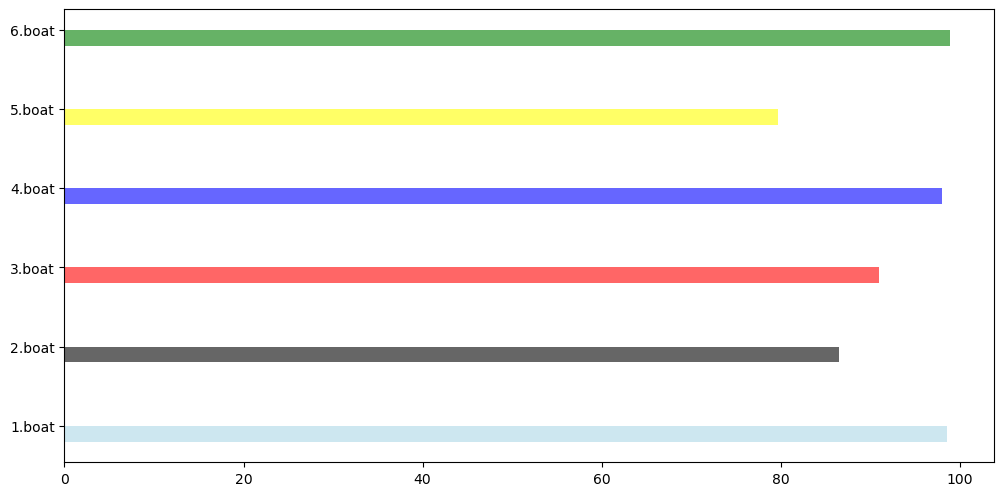

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'MS Gothic'
 
height1 = scaling_metrics["exp_point_feature"].values  # 点数1
#height2 = shusou_score  # 点数2
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ["1.boat","2.boat", "3.boat", "4.boat", "5.boat", "6.boat"]
 
height = 0.2

colors = ["lightblue","black", "red", "blue", "yellow", "green"]

plt.figure(dpi=100, figsize=(12,6))
last = plt.barh(left, height1, height=height, color= colors, alpha = 0.6)
plt.yticks(left + height/2, labels)


In [1]:
import pandas as pd


In [2]:
model_path = "./model_data/"
smooth_ref_data = pd.read_pickle(model_path + "smoothing_ref_data_20221216.pickle")  #smoothingで使うデータフレーム


In [3]:
smooth_ref_dataaaa

,race_num,corse_race_num,racer_lank_int,枠,1着率,2着率,3着率,cabirity,exp_point_feature
race_id,,,,,,,,,
201401010601,NaN,NaN,3,1,NaN,NaN,NaN,NaN,NaN
201401010601,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
201401010601,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN
201401010601,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN
201401010601,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
202211212412,206.0,29.0,3,2,0.091534,0.370026,0.186146,57.570294,16.396275
202211212412,231.0,41.0,2,3,0.454381,0.083487,0.107767,56.684811,16.328519
202211212412,292.0,137.0,3,4,0.141389,0.288722,0.172682,57.189069,16.250811


In [ ]:
a
